Greyscale ℓ1-TV Denoising
=========================

This example demonstrates the use of class [tvl1.TVL1Denoise](http://sporco.rtfd.org/en/latest/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Denoise) for removing salt & pepper noise from a greyscale image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = util.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 8e-1
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                                'RelStopTol': 5e-3, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl1.TVL1Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ         
----------------------------------------------------------------
   0  5.54e+04  2.66e+04  3.60e+04  3.66e-01  1.27e+00  1.70e+00
   1  4.79e+04  3.11e+04  2.09e+04  2.66e-01  8.18e-01  1.70e+00


   2  6.54e+04  3.99e+04  3.18e+04  2.90e-01  4.19e-01  9.70e-01
   3  6.19e+04  4.16e+04  2.54e+04  2.59e-01  2.71e-01  8.08e-01
   4  5.17e+04  3.65e+04  1.91e+04  1.83e-01  2.97e-01  8.08e-01


   5  4.77e+04  3.33e+04  1.80e+04  1.48e-01  1.94e-01  6.33e-01
   6  4.35e+04  3.07e+04  1.60e+04  1.28e-01  1.04e-01  5.54e-01
   7  4.19e+04  3.22e+04  1.21e+04  1.05e-01  1.14e-01  6.15e-01


   8  4.04e+04  3.21e+04  1.04e+04  8.23e-02  9.81e-02  6.15e-01
   9  3.78e+04  3.00e+04  9.85e+03  6.43e-02  6.45e-02  6.15e-01
  10  3.68e+04  2.94e+04  9.28e+03  5.36e-02  5.47e-02  6.15e-01


  11  3.70e+04  3.00e+04  8.83e+03  5.01e-02  4.77e-02  6.15e-01
  12  3.63e+04  2.94e+04  8.66e+03  4.55e-02  3.49e-02  6.15e-01
  13  3.51e+04  2.85e+04  8.32e+03  3.69e-02  3.33e-02  7.03e-01
  14  3.43e+04  2.80e+04  7.88e+03  3.05e-02  3.23e-02  7.03e-01


  15  3.44e+04  2.82e+04  7.72e+03  2.98e-02  2.41e-02  7.03e-01
  16  3.44e+04  2.83e+04  7.64e+03  2.86e-02  1.89e-02  7.81e-01
  17  3.40e+04  2.80e+04  7.49e+03  2.47e-02  2.26e-02  9.61e-01
  18  3.36e+04  2.77e+04  7.41e+03  2.17e-02  2.22e-02  9.61e-01


  19  3.37e+04  2.77e+04  7.48e+03  2.10e-02  1.72e-02  9.61e-01
  20  3.37e+04  2.77e+04  7.52e+03  2.04e-02  1.46e-02  1.06e+00
  21  3.36e+04  2.76e+04  7.47e+03  1.87e-02  1.67e-02  1.26e+00
  22  3.34e+04  2.75e+04  7.42e+03  1.72e-02  1.66e-02  1.26e+00


  23  3.34e+04  2.75e+04  7.40e+03  1.65e-02  1.40e-02  1.26e+00
  24  3.34e+04  2.75e+04  7.40e+03  1.61e-02  1.18e-02  1.26e+00
  25  3.34e+04  2.75e+04  7.38e+03  1.52e-02  1.26e-02  1.47e+00
  26  3.33e+04  2.74e+04  7.37e+03  1.42e-02  1.36e-02  1.61e+00


  27  3.33e+04  2.74e+04  7.38e+03  1.36e-02  1.27e-02  1.61e+00
  28  3.33e+04  2.74e+04  7.39e+03  1.32e-02  1.13e-02  1.61e+00
  29  3.33e+04  2.74e+04  7.39e+03  1.27e-02  1.03e-02  1.61e+00
  30  3.32e+04  2.73e+04  7.38e+03  1.21e-02  1.05e-02  1.79e+00


  31  3.32e+04  2.73e+04  7.38e+03  1.16e-02  1.03e-02  1.79e+00
  32  3.32e+04  2.73e+04  7.37e+03  1.12e-02  9.50e-03  1.79e+00
  33  3.32e+04  2.73e+04  7.37e+03  1.09e-02  8.88e-03  1.79e+00
  34  3.32e+04  2.73e+04  7.37e+03  1.05e-02  9.02e-03  1.98e+00


  35  3.32e+04  2.73e+04  7.37e+03  1.01e-02  8.84e-03  1.98e+00
  36  3.32e+04  2.73e+04  7.37e+03  9.77e-03  8.40e-03  1.98e+00
  37  3.32e+04  2.73e+04  7.38e+03  9.46e-03  7.90e-03  1.98e+00
  38  3.32e+04  2.73e+04  7.38e+03  9.17e-03  7.49e-03  1.98e+00


  39  3.31e+04  2.72e+04  7.38e+03  8.84e-03  7.63e-03  2.19e+00
  40  3.31e+04  2.72e+04  7.38e+03  8.56e-03  7.43e-03  2.19e+00
  41  3.31e+04  2.72e+04  7.38e+03  8.29e-03  7.14e-03  2.19e+00
  42  3.31e+04  2.72e+04  7.38e+03  8.03e-03  6.84e-03  2.19e+00


  43  3.31e+04  2.72e+04  7.38e+03  7.78e-03  6.57e-03  2.19e+00
  44  3.31e+04  2.72e+04  7.38e+03  7.54e-03  6.28e-03  2.19e+00
  45  3.31e+04  2.72e+04  7.38e+03  7.27e-03  6.41e-03  2.40e+00
  46  3.31e+04  2.72e+04  7.38e+03  7.03e-03  6.28e-03  2.40e+00


  47  3.31e+04  2.72e+04  7.38e+03  6.80e-03  6.01e-03  2.40e+00
  48  3.31e+04  2.72e+04  7.38e+03  6.58e-03  5.80e-03  2.40e+00
  49  3.31e+04  2.72e+04  7.38e+03  6.37e-03  5.62e-03  2.40e+00
  50  3.31e+04  2.72e+04  7.37e+03  6.16e-03  5.37e-03  2.40e+00


  51  3.31e+04  2.72e+04  7.37e+03  5.97e-03  5.13e-03  2.40e+00
  52  3.31e+04  2.72e+04  7.37e+03  5.78e-03  4.93e-03  2.40e+00
  53  3.31e+04  2.72e+04  7.37e+03  5.60e-03  4.75e-03  2.40e+00
  54  3.31e+04  2.72e+04  7.37e+03  5.43e-03  4.56e-03  2.40e+00


  55  3.31e+04  2.72e+04  7.37e+03  5.26e-03  4.40e-03  2.40e+00
  56  3.31e+04  2.72e+04  7.37e+03  5.10e-03  4.25e-03  2.40e+00


  57  3.30e+04  2.72e+04  7.37e+03  4.94e-03  4.12e-03  2.40e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time:  4.08 s
Noisy image PSNR:    11.58 dB
Denoised image PSNR: 28.64 dB


Display reference, corrupted, and denoised images.

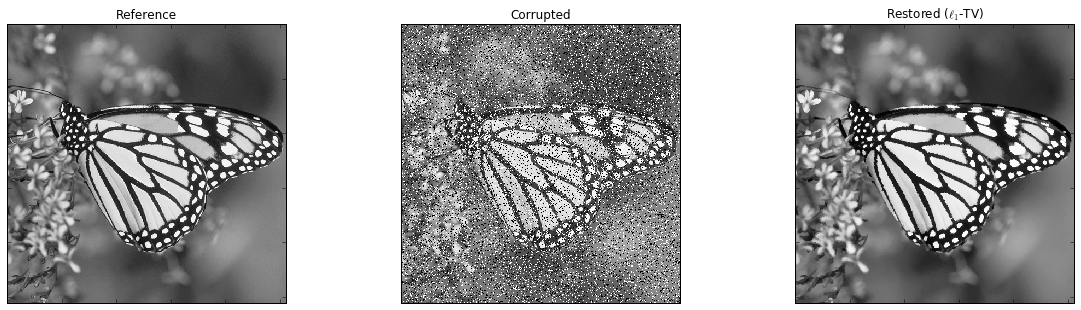

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

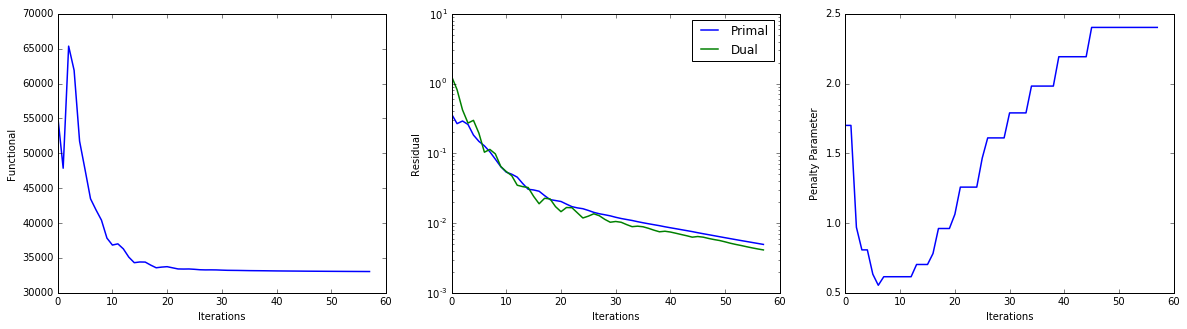

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()